In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Credit_Card_Applications.csv")

In [ ]:
#CUSTOMERS ARE INPUT OF NEURAL NETWORK

#FOR EACH INPUT NODE; WE GET AN OUTPUT NODE WHICH IS THE WINNING NODE
#THIS IS MOST SIMILAR OR CLOSEST TO THE CUSTOMER VECTOR

#USE A NEIGHBORHOOD FUNCTION TO BRING THE NEIGHBORS OF THIS WINNING NODE
#CLOSER TO THIS POINT AND THE RADIUS DECREASES AFTER 1 EPOCHS

#FRAUDS: OUTLYING NEURONS

In [ ]:
#TO DETECT OUTLIERS:

#USE MID: MEAN INTERNEURON DISTANCE: 
#FOR EACH NEURON; COMPUTE MEAN OF EUCLIDEAN DISTANCE BETWEEN 
#THIS NEURON AND ALL IN ITS NEIGHBORHOOD

#DEFINE NEIGHBORHOOD FOR NEURONS

#OUTLIERS WILL BE FAR FROM ALL NEURONS IN THEIR NEIGHBORHOOD

#INVERSE MAPPING FUNCTION TO FIND RECORDS ASSOCIATED WITH 
# THE OUTLYING WINNING NODE

In [3]:
X = df.iloc[:, :-1].values #ALL COLUMNS EXCEPT LAST
y = df.iloc[:, -1].values

In [ ]:
#MAKE DISTINCTION BETWEEN APPROVED AND UNAPPROVED CUSTOMERS
#NOT SUPERVISED LEARNING

In [8]:
#FEATURE SCALING: NORMALISATION
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [9]:
#MINISOM CONTAINS AN IMPLEMENTATION OF SOM
from minisom import MiniSom

In [10]:
#INITIALISE THE SOM
som = MiniSom(
    x=10, y=10, #DIMENSION OF GRID
    input_len = 15, #NUMBER OF FEATURES IN X
    sigma = 1.0, #RADIUS OF NEIGHBORHOOD
    learning_rate = 0.5, #WEIGHT UPDATION 
)

In [12]:
#INITIALISE THE WEIGHTS OF SOM [COORDINATES OF OUTPUT NODES]
som.random_weights_init(X) #DATA FOR TRAINING
som.train_random(
    data = X, #TRAINING DATA
    num_iteration = 100
)

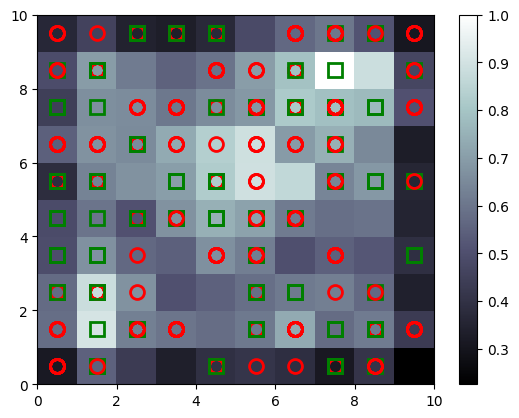

In [19]:
#VISUALISE THE RESULTS: PLOT THE SOM: COLOR BASED ON MID
from pylab import bone, pcolor, colorbar, plot, show

#INITIALISE FIGURE
bone()

#ADD INFORMATION ON MID: COLORS FOR RANGES
pcolor(som.distance_map().T) #TRANSPOSE OF MID

#ADD A LEGEND
colorbar() #NORMALISED MID VALUES

#ADD MARKERS USING LABELS: APPROVED OR NOT APPROVED
markers = ['o', 's'] #CIRCLE & SQUARE
colors = ['r', 'g'] #RED OR GREEN

for i, x in enumerate(X): #GET INDEX & DATA
    #GET WINNING NODE FOR RECORD
    w = som.winner(x)
    
    #PLACE MARKER
    plot(
        w[0]+0.5, w[1]+0.5, #COORDINATES OF CENTER OF NODE
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2
        
    )
show()

In [27]:
#RELEVANT FRAUDS ARE THOSE WHO GOT APPROVED
#GET LIST OF CUSTOMERS BY INVERSE-MAPPING

#GET MAPPINGS
mappings = som.win_map(X) # NODE: LIST OF CUSTOMERS

#NODE1: 7, 8. [BOTTOM LEFT POINT]
#NODE2: 1, 1
frauds1 = mappings[(7,8)]
frauds2 = mappings[(1,1)] #LIST OF CUSTOMERS WITH THAT WINNING NODE
frauds = np.concatenate((frauds1, frauds2), axis = 0) #VERTICAL CONCATENATION

In [29]:
#LIST OF PROBABLE FRAUDS
frauds = sc.inverse_transform(frauds)

In [32]:
frauds

array([[1.5799785e+07, 1.0000000e+00, 5.6420000e+01, 2.8000000e+01,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 2.8500000e+01,
        1.0000000e+00, 1.0000000e+00, 4.0000000e+01, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.6000000e+01],
       [1.5790113e+07, 1.0000000e+00, 1.7500000e+01, 2.2000000e+01,
        3.0000000e+00, 1.0000000e+00, 7.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        3.0000000e+00, 4.5000000e+02, 1.0000100e+05]])